# Implementing the coded LR algorithm on a dataset - 1

In [490]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
folder_name = r"C:/Sumay"
name = "CarPrice_Assignment.csv"
print(os.path.join(folder_name,name))

C:/Sumay\CarPrice_Assignment.csv


In [491]:
df=pd.read_csv('C:/Sumay/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [492]:
#Cleaning the Car name
CompanyName = df['CarName'].apply(lambda x: x.split(' ')[0])
df.insert(3, "CompanyName", CompanyName)
df.drop(['CarName'], axis=1, inplace=True)
df

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


There are inconveniences due to spelling errors, example, maxda and mazda, etc.

In [493]:
df.CompanyName = df.CompanyName.str.lower()
def replace_name(a,b):
    df.CompanyName.replace(a,b,inplace=True)
replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

C:\Users\talkt\AppData\Local\Temp\ipykernel_15940\3495997584.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.CompanyName.replace(a,b,inplace=True)


In [494]:
df.drop(['car_ID'], axis=1, inplace=True)
df['doornumber']= df['doornumber'].replace({'four':4, 'two':2})
df['cylindernumber']=df['cylindernumber'].replace({'four': 4, 'five':5, 'six':6, 'three':3, 'twelve':12, 'two':2, 'eight':8})
df['fueltype']= df['fueltype'].replace({'gas':0, 'diesel':1})
df['aspiration']= df['aspiration'].replace({'std':0, 'turbo':1})
df['carbody']= df['carbody'].replace({'convertible':0, 'hardtop':1, 'hatchback':2, 'sedan':3, 'wagon':4})
df['drivewheel']= df['drivewheel'].replace({'4wd':0, 'fwd':1, 'rwd':2})
df['enginelocation']= df['enginelocation'].replace({'front':0, 'rear':1})
df['enginetype']= df['enginetype'].replace({'dohc':0, 'dohcv':1, 'l':2, 'ohc':3, 'ohcf':4, 'ohcv': 5, 'rotor':6})
df['fuelsystem']= df['fuelsystem'].replace({'1bbl':0, '2bbl':1, '4bbl':2, 'idi':3, 'mfi':4, 'mpfi': 5, 'spdi':6, 'spfi':7})

C:\Users\talkt\AppData\Local\Temp\ipykernel_15940\2035576330.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['doornumber']= df['doornumber'].replace({'four':4, 'two':2})
C:\Users\talkt\AppData\Local\Temp\ipykernel_15940\2035576330.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['cylindernumber']=df['cylindernumber'].replace({'four': 4, 'five':5, 'six':6, 'three':3, 'twelve':12, 'two':2, 'eight':8})
C:\Users\talkt\AppData\Local\Temp\ipykernel_15940\2035576330.py:4: FutureWarning: Downcasting behavior in `replace` is d

In [495]:
unique_values=df['CompanyName'].unique()
label_mapping = {value: idx for idx, value in enumerate(unique_values)}
df['CompanyName']=df['CompanyName'].map(label_mapping)

In [496]:
df

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,2,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,2,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,1,0,0,4,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,1,0,0,4,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,21,0,0,4,3,2,0,109.1,188.8,...,141,5,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,21,0,1,4,3,2,0,109.1,188.8,...,141,5,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,21,0,0,4,3,2,0,109.1,188.8,...,173,5,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,21,1,1,4,3,2,0,109.1,188.8,...,145,3,3.01,3.40,23.0,106,4800,26,27,22470.0


In [497]:
corr=df.corr()
corr

,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.118794,-0.194311,-0.059866,-0.664073,-0.596135,-0.041671,0.212471,-0.531954,-0.357612,...,-0.105790,0.091163,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
CompanyName,-0.118794,1.000000,0.113191,0.054265,0.164195,0.089494,-0.004317,0.054608,0.078505,0.119584,...,-0.070918,0.146624,0.251140,-0.201025,0.138828,-0.055763,-0.218655,0.053642,0.050022,-0.153948
fueltype,-0.194311,0.113191,1.000000,0.401397,0.191491,0.147853,0.132257,-0.040070,0.308346,0.212679,...,0.069594,-0.041529,0.054451,0.241829,0.984356,-0.163926,-0.476883,0.255963,0.191392,0.105679
aspiration,-0.059866,0.054265,0.401397,1.000000,0.031792,0.063028,0.066465,-0.057191,0.257611,0.234539,...,0.108217,0.288086,0.212614,0.222982,0.295541,0.241685,-0.183383,-0.202362,-0.254416,0.177926
doornumber,-0.664073,0.164195,0.191491,0.031792,1.000000,0.680358,-0.098954,-0.137757,0.447357,0.398568,...,0.020742,-0.015519,0.119258,-0.011082,0.177888,-0.126947,-0.247668,-0.012417,-0.036330,0.031835
carbody,-0.596135,0.089494,0.147853,0.063028,0.680358,1.000000,-0.155745,-0.277009,0.401362,0.334433,...,-0.073352,-0.065079,0.010549,-0.015325,0.136243,-0.153928,-0.109643,0.031697,-0.007170,-0.083976
drivewheel,-0.041671,-0.004317,0.132257,0.066465,-0.098954,-0.155745,1.000000,0.147865,0.459745,0.485649,...,0.524307,0.424686,0.481827,0.071591,0.127479,0.518686,-0.039417,-0.449581,-0.452220,0.577992
enginelocation,0.212471,0.054608,-0.040070,-0.057191,-0.137757,-0.277009,0.147865,1.000000,-0.187790,-0.050989,...,0.196826,0.105971,0.185042,-0.138455,-0.019762,0.317839,0.198461,-0.153487,-0.102026,0.324973
wheelbase,-0.531954,0.078505,0.308346,0.257611,0.447357,0.401362,0.459745,-0.187790,1.000000,0.874587,...,0.569329,0.384601,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.119584,0.212679,0.234539,0.398568,0.334433,0.485649,-0.050989,0.874587,1.000000,...,0.683360,0.557810,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920


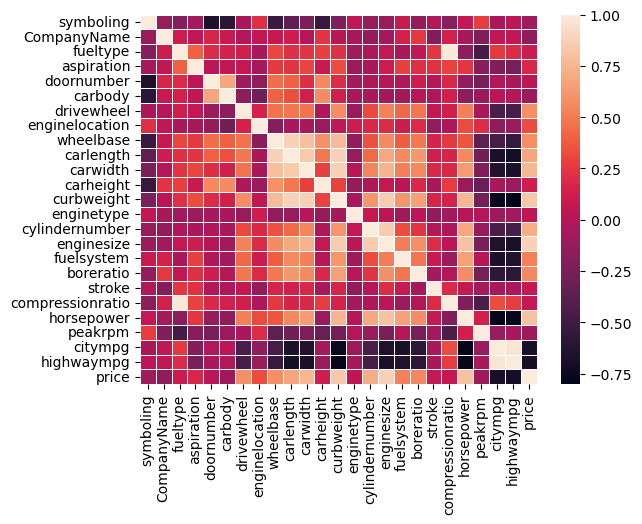

In [498]:
sns.heatmap(corr, fmt='.2f', linewidths=0.5)
plt.show()

In [499]:
df.drop(columns=['symboling', 'carheight', 'stroke', 'compressionratio', 'peakrpm', 'citympg', 'highwaympg', 'CompanyName', 'fuelsystem'], inplace=True)
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,0,0,2,0,2,0,88.6,168.8,64.1,2548,0,4,130,3.47,111,13495.0
1,0,0,2,0,2,0,88.6,168.8,64.1,2548,0,4,130,3.47,111,16500.0
2,0,0,2,2,2,0,94.5,171.2,65.5,2823,5,6,152,2.68,154,16500.0
3,0,0,4,3,1,0,99.8,176.6,66.2,2337,3,4,109,3.19,102,13950.0
4,0,0,4,3,0,0,99.4,176.6,66.4,2824,3,5,136,3.19,115,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0,0,4,3,2,0,109.1,188.8,68.9,2952,3,4,141,3.78,114,16845.0
201,0,1,4,3,2,0,109.1,188.8,68.8,3049,3,4,141,3.78,160,19045.0
202,0,0,4,3,2,0,109.1,188.8,68.9,3012,5,6,173,3.58,134,21485.0
203,1,1,4,3,2,0,109.1,188.8,68.9,3217,3,6,145,3.01,106,22470.0


In [500]:
#standardization or feature scaling
df = (df - df.mean())/df.std()
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price
0,-0.327995,-0.468149,-1.127628,-3.043525,1.210367,-0.121569,-1.686643,-0.425480,-0.842719,-0.014531,-2.858109,-0.352025,0.074267,0.517804,0.174057,0.027324
1,-0.327995,-0.468149,-1.127628,-3.043525,1.210367,-0.121569,-1.686643,-0.425480,-0.842719,-0.014531,-2.858109,-0.352025,0.074267,0.517804,0.174057,0.403473
2,-0.327995,-0.468149,-1.127628,-0.715455,1.210367,-0.121569,-0.706865,-0.230948,-0.190101,0.513625,1.882282,1.498364,0.602571,-2.399008,1.261448,0.403473
3,-0.327995,-0.468149,0.882491,0.448579,-0.587642,-0.121569,0.173274,0.206750,0.136209,-0.419770,-0.013874,-0.352025,-0.430023,-0.516003,-0.053537,0.084279
4,-0.327995,-0.468149,0.882491,0.448579,-2.385652,-0.121569,0.106848,0.206750,0.229440,0.515545,-0.013874,0.573169,0.218350,-0.516003,0.275209,0.522389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.327995,-0.468149,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.394830,0.761377,-0.013874,-0.352025,0.338419,1.662375,0.249921,0.446659
201,-0.327995,2.125651,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.348215,0.947672,-0.013874,-0.352025,0.338419,1.662375,1.413178,0.722042
202,-0.327995,-0.468149,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.394830,0.876611,1.882282,1.498364,1.106861,0.923942,0.755685,1.027468
203,3.033954,2.125651,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.394830,1.270327,-0.013874,1.498364,0.434474,-1.180593,0.047616,1.150765


In [501]:
y=df['price']
y

0      0.027324
1      0.403473
2      0.403473
3      0.084279
4      0.522389
         ...   
200    0.446659
201    0.722042
202    1.027468
203    1.150765
204    1.170167
Name: price, Length: 205, dtype: float64

In [502]:
df.drop(['price'], axis=1, inplace=True)

In [503]:
df

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower
0,-0.327995,-0.468149,-1.127628,-3.043525,1.210367,-0.121569,-1.686643,-0.425480,-0.842719,-0.014531,-2.858109,-0.352025,0.074267,0.517804,0.174057
1,-0.327995,-0.468149,-1.127628,-3.043525,1.210367,-0.121569,-1.686643,-0.425480,-0.842719,-0.014531,-2.858109,-0.352025,0.074267,0.517804,0.174057
2,-0.327995,-0.468149,-1.127628,-0.715455,1.210367,-0.121569,-0.706865,-0.230948,-0.190101,0.513625,1.882282,1.498364,0.602571,-2.399008,1.261448
3,-0.327995,-0.468149,0.882491,0.448579,-0.587642,-0.121569,0.173274,0.206750,0.136209,-0.419770,-0.013874,-0.352025,-0.430023,-0.516003,-0.053537
4,-0.327995,-0.468149,0.882491,0.448579,-2.385652,-0.121569,0.106848,0.206750,0.229440,0.515545,-0.013874,0.573169,0.218350,-0.516003,0.275209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-0.327995,-0.468149,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.394830,0.761377,-0.013874,-0.352025,0.338419,1.662375,0.249921
201,-0.327995,2.125651,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.348215,0.947672,-0.013874,-0.352025,0.338419,1.662375,1.413178
202,-0.327995,-0.468149,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.394830,0.876611,1.882282,1.498364,1.106861,0.923942,0.755685
203,3.033954,2.125651,0.882491,0.448579,1.210367,-0.121569,1.717669,1.195622,1.394830,1.270327,-0.013874,1.498364,0.434474,-1.180593,0.047616


In [504]:
X=df

In [505]:
y=y.to_numpy()
y

array([ 2.73242539e-02,  4.03473402e-01,  4.03473402e-01,  8.42786174e-02,
        5.22389106e-01,  2.47005370e-01,  5.54934457e-01,  7.06395512e-01,
        1.32663479e+00,  5.73606350e-01,  3.94711192e-01,  4.56672533e-01,
        9.63003084e-01,  9.79901631e-01,  1.41300514e+00,  2.18846071e+00,
        3.50967677e+00,  2.95452819e+00, -1.01713115e+00, -8.73931609e-01,
       -8.38882770e-01, -9.64432718e-01, -8.63667306e-01, -6.65891714e-01,
       -8.82193121e-01, -8.24237362e-01, -7.09452414e-01, -5.90661884e-01,
       -5.45223568e-01, -3.91433660e-02, -8.50899515e-01, -8.03833931e-01,
       -9.86087894e-01, -8.44640793e-01, -7.69536138e-01, -7.48757183e-01,
       -7.48757183e-01, -6.73652528e-01, -5.23443218e-01, -5.54736824e-01,
       -3.73233907e-01, -4.15216801e-02, -3.66975186e-01, -8.12596140e-01,
       -5.45786853e-01, -5.45786853e-01, -2.78977565e-01,  2.37497060e+00,
        2.78804621e+00,  2.84437470e+00, -1.01162348e+00, -8.98966494e-01,
       -8.11344396e-01, -

In [506]:
X=X.to_numpy()
X

array([[-0.32799505, -0.4681493 , -1.12762792, ...,  0.07426712,
         0.51780381,  0.17405669],
       [-0.32799505, -0.4681493 , -1.12762792, ...,  0.07426712,
         0.51780381,  0.17405669],
       [-0.32799505, -0.4681493 , -1.12762792, ...,  0.60257108,
        -2.39900756,  1.26144842],
       ...,
       [-0.32799505, -0.4681493 ,  0.88249141, ...,  1.10686123,
         0.9239421 ,  0.75568483],
       [ 3.03395419,  2.12565086,  0.88249141, ...,  0.43447437,
        -1.18059269,  0.04761579],
       [-0.32799505,  2.12565086,  0.88249141, ...,  0.3384191 ,
         1.66237536,  0.24992123]])

In [507]:
X.shape, y.shape

((205, 15), (205,))

In [508]:
import numpy as np

In [509]:
#Splitting data into train and test set
def split_data(X, y, test_size=0.2, random_state=0):
    np.random.seed(random_state)
    indices=np.random.permutation(len(X))
    data_test_size=int(X.shape[0]*test_size)
    train_indices=indices[data_test_size:]
    test_indices=indices[:data_test_size]
    X_train = X[train_indices]
    y_train = y[train_indices]
    X_test = X[test_indices]
    y_test = y[test_indices]
    return X_train, y_train, X_test, y_test

Now lets import the coded algorithm

In [510]:
class LinearRegression():
    def __init__(self, lr=0.01, n_iters=1000):
        self.lr=lr
        self.n_iters=n_iters
        self.weights=None
        self.bias=None
    def train(self, X, y):
        n_samples, n_features=X.shape
        self.weights=np.zeros(n_features)
        self.bias=0
        train_loss=[]
        num_iters=[]
        for _ in range(self.n_iters):
            cost=0
            y_pred=np.dot(X, self.weights)+self.bias
            loss=(1/n_samples)*((y_pred-y)**2)/2
            cost+=loss
            train_loss.append(cost)
            dw=(2/n_samples)*(np.dot(X.T, (y_pred-y)))
            db=(2/n_samples)*(np.sum(y_pred-y))
            self.weights=self.weights-(self.lr*dw)
            self.bias=self.bias-(self.lr*db)
            num_iters.append(_)
        return train_loss, num_iters
    def test(self, X):
        y_pred=np.dot(X, self.weights)+self.bias
        return y_pred

In [511]:
from sklearn import datasets

In [512]:
A, b = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)

In [513]:
A_train, b_train, A_test, b_test=split_data(A,b)

In [514]:
regressor=LinearRegression(lr=0.01)

In [515]:
regressor.train(A_train,b_train)
predictions = regressor.test(A_test)

In [516]:
def mse(y_test, predictions):
    return np.mean((y_test-predictions)**2)

In [517]:
mse = mse(b_test, predictions)
print(mse)

284.0383209354515


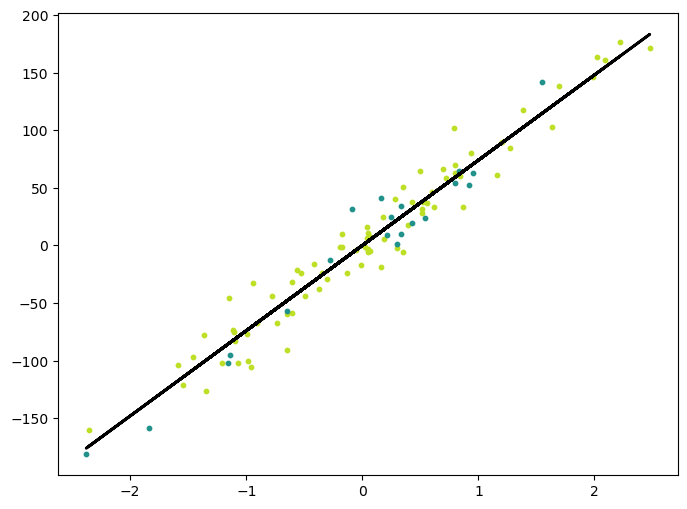

In [518]:
y_pred_line = regressor.test(A)
cmap = plt.get_cmap('viridis')
fig = plt.figure(figsize=(8,6))
m1 = plt.scatter(A_train, b_train, color=cmap(0.9), s=10)
m2 = plt.scatter(A_test, b_test, color=cmap(0.5), s=10)
plt.plot(A, y_pred_line, color='black', linewidth=2, label='Prediction')
plt.show()